In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *


#My image
file_path = 'Dropbox Files/hel1.pma'
image_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Chanel image paths
CH1_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "../Channel Mapping/hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

good_peaks_1,_ = good_peak_finder(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks(good_peaks_1)
good_peaks_2_CH2 = shift_peaks(good_peaks_2_new)

# Poly Mapping
CH1_peaks_10 = np.array([[55,63], [14, 194], [179, 45], [115, 172], [273, 65], [257, 192], [358, 91], [365, 199], [419, 44], [445, 205]])
CH2_peaks_10 = np.array([[60, 322], [18, 453], [183, 304], [119, 431], [276, 323], [258, 450], [359, 350], [364, 456], [420, 301], [446, 462]])

params_x_man_10, params_y_man_10 = find_polyfit_params(CH1_peaks_10, CH2_peaks_10, degree=3)
mapped_peaks_10 = apply_polyfit_params(good_peaks_1, params_x_man_10, params_y_man_10).astype(np.uint16)
poly_pair_count_tol4_10, poly_pair_arr_CH1_tol4_10, poly_pair_arr_CH2_tol4_10 = find_polyfit_pairs(mapped_peaks_10, good_peaks_1, tolerance=4)


In [2]:
print(f"First CH1 peak: {poly_pair_arr_CH1_tol4_10[0]}")

First CH1 peak: [493 135]


In [3]:
# def draw_circle(radius, y_centre, x_centre, background_dim, dimension, colour=[255, 255, 255]):

#     diameter = 2 * radius + 1
#     circle_array = np.zeros((background_dim, background_dim, dimension), dtype=np.uint8)
    

#     # Midpoint circle algorithm
#     x = radius
#     y = 0
#     p = 1 - radius
    
#     while x >= y:
#         circle_array[x_centre + x, y_centre + y] = colour
#         circle_array[x_centre - x, y_centre + y] = colour
#         circle_array[x_centre + x, y_centre - y] = colour
#         circle_array[x_centre - x, y_centre - y] = colour
#         circle_array[x_centre + y, y_centre + x] = colour
#         circle_array[x_centre - y, y_centre + x] = colour
#         circle_array[x_centre + y, y_centre - x] = colour
#         circle_array[x_centre - y, y_centre - x] = colour
        
#         y += 1
#         if p <= 0:
#             p = p + 2 * y + 1
#         else:
#             x -= 1
#             p = p + 2 * y - 2 * x + 1
    
#     return circle_array

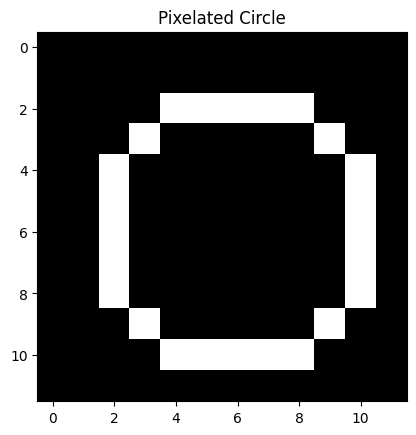

Maximum element value in total_arr:255
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [255 255 255]
  [  0   

In [4]:
radius = 4
background_dim= 12
circle_array = draw_circle(radius, 6, 6, background_dim, 3)

# Display the circle using matplotlib
background = np.zeros((background_dim, background_dim, 3), dtype=np.uint8)
total_arr = np.add(background, circle_array)
plt.imshow(total_arr, cmap='gray')
plt.title('Pixelated Circle')
plt.show()

print(f"Maximum element value in total_arr:{np.max(total_arr)}")
print(total_arr)


In [5]:
circle_array_CH1 = draw_circle(4, poly_pair_arr_CH1_tol4_10[:,1], poly_pair_arr_CH1_tol4_10[:,0], image.shape[0], 3)
circle_array_CH2 = draw_circle(4, poly_pair_arr_CH2_tol4_10[:,1], poly_pair_arr_CH2_tol4_10[:,0], image.shape[0], 3)

all_arr = np.add(circle_array_CH1, circle_array_CH2)
# print(all_arr[487:501, 129:141])

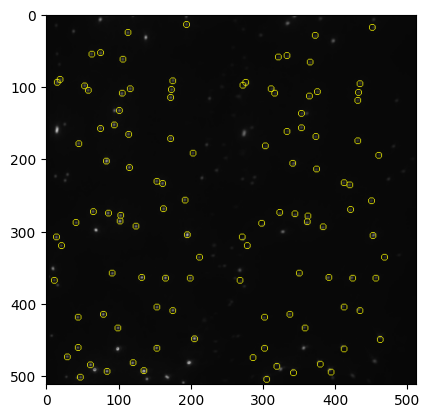

In [17]:
mask = (all_arr == [255, 255, 255]).all(axis=-1)
image_3d = np.repeat(image[..., np.newaxis], 3, -1)

# Set the pixels in the mask to be yellow
image_3d[mask] = [255, 255, 0]
# Display the modified image
plt.imshow(image_3d)
plt.show()

In [ ]:
# def plot_circles(image, radius, y_centre, x_centre, background_dim, dimension=3, colour=[255, 255, 255]):
#     circle_array = draw_circle(radius, y_centre, x_centre, background_dim, dimension, colour)
#     mask = (all_arr == colour)
#     image_3d = np.repeat(image[..., np.newaxis], 3, -1)


#     # Set the pixels in the mask to be yellow
#     image_3d[mask] = [255]

#     # Display the modified image
#     plt.imshow(image_3d)
#     plt.show()
    

In [ ]:
# plot_circles(image, 6, poly_pair_arr_CH1_tol4_10[:,1], poly_pair_arr_CH1_tol4_10[:,0], image.shape[0], 3, [255, 255, 255])